<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверим,-что-эффективность-обогащения-рассчитана-правильно." data-toc-modified-id="Проверим,-что-эффективность-обогащения-рассчитана-правильно.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверим, что эффективность обогащения рассчитана правильно.</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><strong>Вывод</strong></a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-на-различных-этапах" data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-на-различных-этапах-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов на различных этапах</a></span></li><li><span><a href="#Распределение-размеров-гранул-исходного-сырья" data-toc-modified-id="Распределение-размеров-гранул-исходного-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размеров гранул исходного сырья</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-металлов-на-разных-стадиях" data-toc-modified-id="Исследуем-суммарную-концентрацию-металлов-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию металлов на разных стадиях</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-разных-моделей" data-toc-modified-id="Обучение-разных-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение разных моделей</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Необходимо создать прототипамодели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. На вход имеем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Для выполнения проекта обращаемся к библиотекам *pandas*, *matplotlib* и *sklearn* 

## Подготовка данных

In [1]:
# Загрузка необходимых библиотек
mport pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

import warnings

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import (
    make_scorer, 
    mean_squared_error, 
    mean_absolute_error) 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.pipeline import Pipeline

from sklearn.model_selection import (
    GridSearchCV, 
    RandomizedSearchCV,
    train_test_split,
    cross_val_score
)
from sklearn.dummy import DummyRegressor

# настройки
warnings.filterwarnings("ignore")

In [2]:
#Загрузим данные из текущий папки или с локальной/сетевой папки
pth_local_user_train = '/Users/maxim/Documents/Data science/datasets/gold_industry_train.csv'
pth_local_user_test = '/Users/maxim/Documents/Data science/datasets/gold_industry_test.csv'
pth_local_user_full = '/Users/maxim/Documents/Data science/datasets/gold_industry_full.csv'

pth_local_train = '/datasets/gold_industry_train.csv'
pth_local_test = '/datasets/gold_industry_test.csv'
pth_local_full = '/datasets/gold_industry_full.csv'

pth_web_train = 'https:.../gold_industry_train.csv'
pth_web_test = 'https:.../gold_industry_test.csv'
pth_web_full = 'https:.../gold_industry_full.csv'
    
if os.path.exists(pth_local_user_train):
    gold_industry_train = pd.read_csv(pth_local_user_train, sep=',', index_col = 'date', parse_dates=['date'])
    gold_industry_test = pd.read_csv(pth_local_user_test, sep=',', index_col = 'date', parse_dates=['date'])
    gold_industry_full = pd.read_csv(pth_local_user_full, sep=',', index_col = 'date', parse_dates=['date'])
    
elif os.path.exists(pth_local_train):
    gold_industry_train = pd.read_csv(pth_local_train, sep=',', index_col = 'date', parse_dates=['date'])
    gold_industry_test = pd.read_csv(pth_local_test, sep=',', index_col = 'date', parse_dates=['date'])
    gold_industry_full = pd.read_csv(pth_local_full, sep=',', index_col = 'date', parse_dates=['date'])
elif os.path.exists(pth_web_train):
    gold_industry_train = pd.read_csv(pth_web_train, sep=',', index_col = 'date', parse_dates=['date'])
    gold_industry_test = pd.read_csv(pth_web_test, sep=',', index_col = 'date', parse_dates=['date'])
    gold_industry_full = pd.read_csv(pth_web_full, sep=',', index_col = 'date', parse_dates=['date'])
else:
    print('Something is wrong')


In [3]:
# Сброс ограничений на количество выводимых рядов
pd.set_option('display.max_rows', 100)
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', 100)
 
# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', 100)

# Сброс ограничений на количество символов в категории
pd.set_option('display.max_seq_items', 100)

Посмотрим на загруженные датасеты

In [4]:
print('Размер полной выборки:',gold_industry_full.shape)
print('Размер обучающей выборки:',gold_industry_train.shape)
print('Размер тестовой выборки:',gold_industry_test.shape)

Размер полной выборки: (19439, 86)
Размер обучающей выборки: (14579, 86)
Размер тестовой выборки: (4860, 52)


In [5]:
gold_industry_train.head(2)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.37500,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.89366,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.2

In [6]:
gold_industry_test.head(2)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.5,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.5,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [7]:
gold_industry_full.head(2)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.37500,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.89366,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.2

In [8]:
gold_industry_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               19439 non-null  float64
 1   rougher.input.feed_ag                               19439 non-null  float64
 2   rougher.input.feed_pb                               19339 non-null  float64
 3   rougher.input.feed_sol                              19340 non-null  float64
 4   rougher.input.feed_rate                             19428 non-null  float64
 5   rougher.input.feed_size                             19294 non-null  float64
 6   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 7   rougher.input.floatbank10_xanthate                  19431 non-null  float64
 8   rougher.state.floatbank10_a_air          

**Вывод:**

Выгрузки train и test отличаются по набору признаков. 
В дальнейшем будем работать с выгрузками train и test, а информацию из full использовать только для финальной оценки качества прогнозирования.

### Проверим, что эффективность обогащения рассчитана правильно.

Проверим на обучающей выборке

In [9]:
temp_df = pd.DataFrame()
C_au = gold_industry_train['rougher.output.concentrate_au']
F_au = gold_industry_train['rougher.input.feed_au']
T_au = gold_industry_train['rougher.output.tail_au']

# Рассчитаем коэффициент Recovery по данным о концентрации
temp_df['rougher.output.recovery_calc'] = 100*C_au*(F_au-T_au)/(F_au*(C_au-T_au))
temp_df.set_index(gold_industry_train.index)

,rougher.output.recovery_calc
date,
2016-01-15 00:00:00,87.107763
2016-01-15 01:00:00,86.843261
2016-01-15 02:00:00,86.842308
2016-01-15 03:00:00,87.226430
2016-01-15 04:00:00,86.688794
...,...
2017-12-09 09:59:59,87.684717
2017-12-09 10:59:59,90.677361
2017-12-09 11:59:59,89.574376


Посмотрим насколько значения столбцов совпадает по всем строкам на основании MAE метрики

In [10]:
mae_rec = mean_absolute_error(gold_industry_train['rougher.output.recovery'], 
                         temp_df['rougher.output.recovery_calc'])
print(mae_rec)

1.1583725420138659e-14


**Вывод:** значение rougher.output.recovery в исходных данных указано для золота верно и выражено в процентах 

###  Анализ признаков, недоступных в тестовой выборке

Выведем список всех столбцов, которые присутстуют в обучающей выборке, но отсутствуют в тестовой

In [11]:
s = set(gold_industry_test.columns)
miss_columns = [x for x in gold_industry_train.columns if x not in s]
print(pd.Series(miss_columns))

0          rougher.calculation.sulfate_to_au_concentrate
1     rougher.calculation.floatbank10_sulfate_to_au_feed
2     rougher.calculation.floatbank11_sulfate_to_au_feed
3                        rougher.calculation.au_pb_ratio
4                          rougher.output.concentrate_au
5                          rougher.output.concentrate_ag
6                          rougher.output.concentrate_pb
7                         rougher.output.concentrate_sol
8                                rougher.output.recovery
9                                 rougher.output.tail_au
10                                rougher.output.tail_ag
11                                rougher.output.tail_pb
12                               rougher.output.tail_sol
13                 primary_cleaner.output.concentrate_au
14                 primary_cleaner.output.concentrate_ag
15                 primary_cleaner.output.concentrate_pb
16                primary_cleaner.output.concentrate_sol
17                        prima

**Вывод:** 

В обучающей выборке присутствуют онлайн метрики, характеризующие параметры конечного продукта и расчетные показатели, основаннные на этих параметрах. В тестовой выборке эти данные недоступны. В тестовой выборке присутствуют только начальные характеристики сырья и параметры внешних условий (настройки установки, концентрация входных компонент и пр. внешние критерии). В качестве целевого признака в тестовых данных будет служить только 1 расчетный показатель - recovery



### Предобработка данных

In [12]:
# Запомним начальные и конечные индексы в train & test
last_index_train = gold_industry_train.index[-1]
first_index_test = gold_industry_test.index[0]
print ('Последний индекс в train: ', last_index_train)
print ('Первый индекс в test: ', first_index_test)

Последний индекс в train:  2017-12-09 13:59:59
Первый индекс в test:  2017-12-09 14:59:59


In [13]:
# Посмотрим на последнюю строку в трейн и первую строку в тест
gold_industry_full.loc[last_index_train:first_index_test]

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-09 13:59:59,4.525061,5.970515,4.020002,40.074026,555.682872,122.262690,6.586020,9.299606,1204.866639,-299.235675,1149.942902,-501.717903,1049.604390,-500.549053,952.702732,-502.352296,849.016017,-500.505677,850.455635,-506.897968,6.584130,9.300133,44585.181334,2510.813545,2510.142433,1.125637,15.111231,8.523497,8.955135,22.786467,88.890579,0.685059,4.050010,0.636095,18.323080,105.666118,7.955111,6.5,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,-399.988275,1649.772714,-399.831902,31.856742,7.128896,12.633558,7.941900,2.612231,22.298149,6.278250,4.457457,35.003586,-501.083794,29.990533,-611.855898,25.948429,-500.067268,22.968268,-499.839442,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,0.0,0.0,0.0,0.0,46.795691,3.109998,11.434366,6.886013,67.002189,1.596616,8.529606,2.911418,11.115147
2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,

В этих строках нет пропущенных значений или нулей в целевых признаках, поэтому их не придется удалять в ходе предобработки

Удалим из обучающей выборки все столбцы, которых нет в тестовой

In [14]:
gold_industry_train_final = gold_industry_train.drop(columns=miss_columns)

Посмотрим на пропуски в столбцах. Для столбцов, в которых есть пропуски, постороим график

In [15]:
gold_industry_train_final.isna().sum()

rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          72
rougher.input.feed_sol                         77
rougher.input.feed_rate                         7
rougher.input.feed_size                       101
rougher.input.floatbank10_sulfate              31
rougher.input.floatbank10_xanthate              7
rougher.state.floatbank10_a_air                 0
rougher.state.floatbank10_a_level               0
rougher.state.floatbank10_b_air                 0
rougher.state.floatbank10_b_level               0
rougher.state.floatbank10_c_air                 0
rougher.state.floatbank10_c_level               0
rougher.state.floatbank10_d_air                 0
rougher.state.floatbank10_d_level               0
rougher.state.floatbank10_e_air               429
rougher.state.floatbank10_e_level               0
rougher.state.floatbank10_f_air                 0
rougher.state.floatbank10_f_level               0


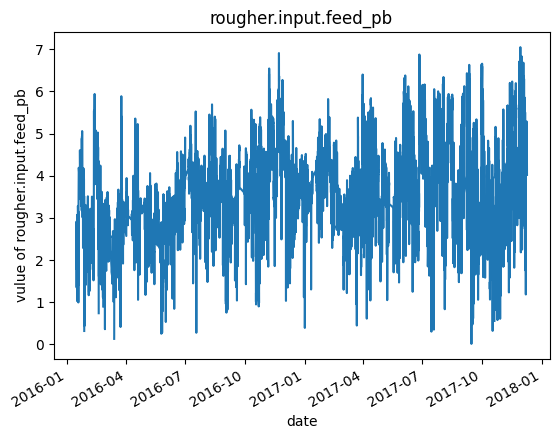

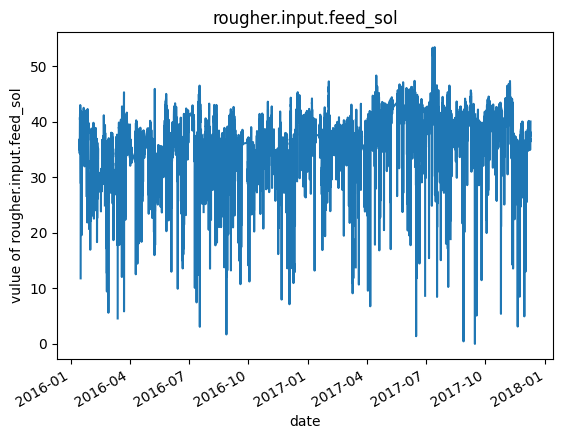

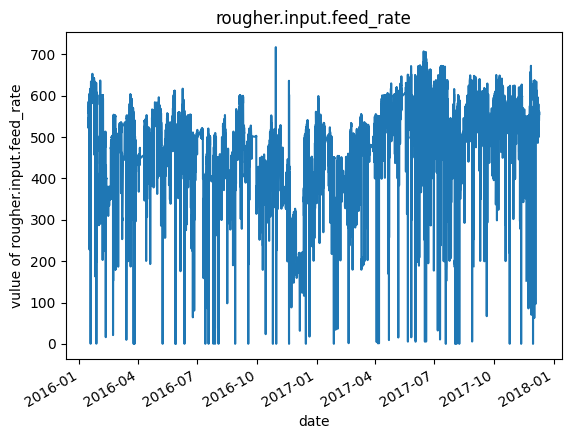

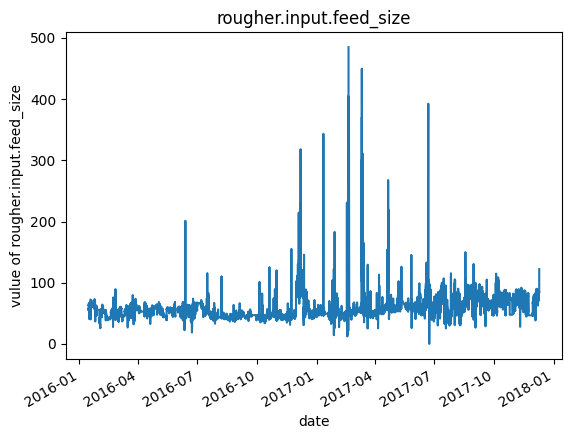

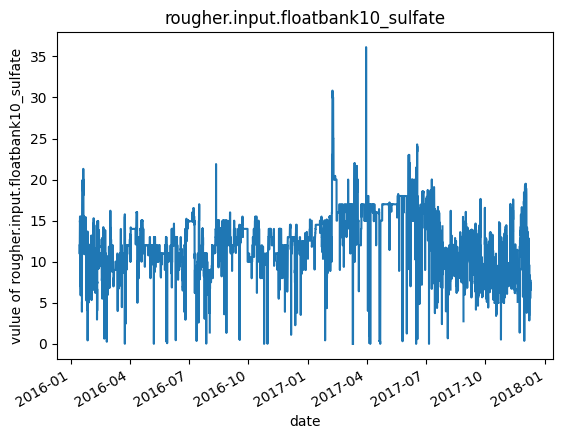

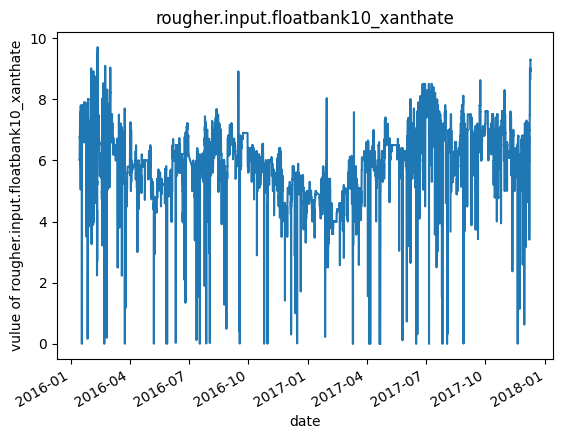

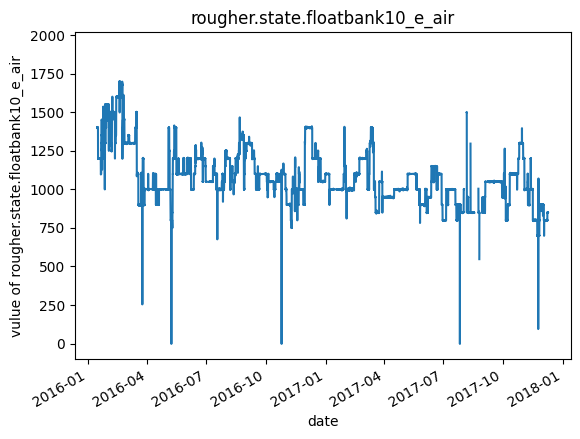

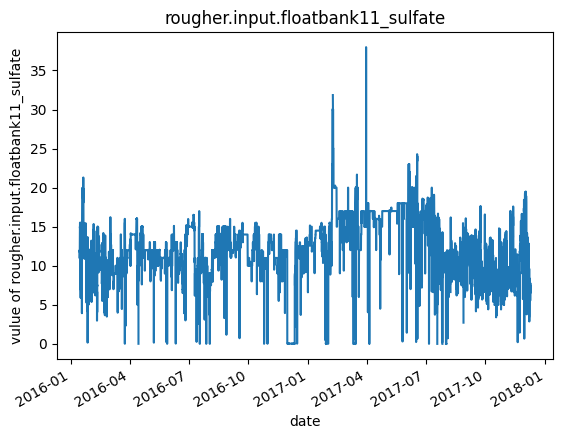

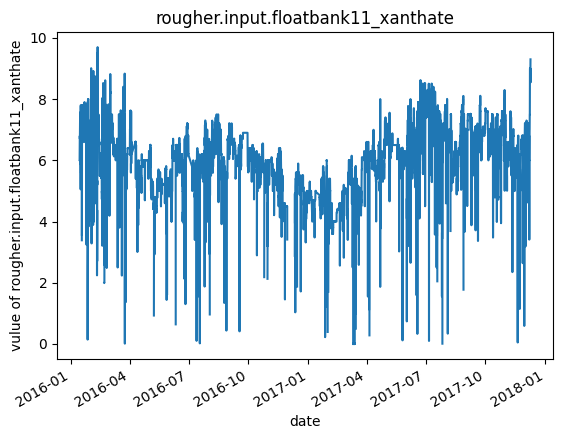

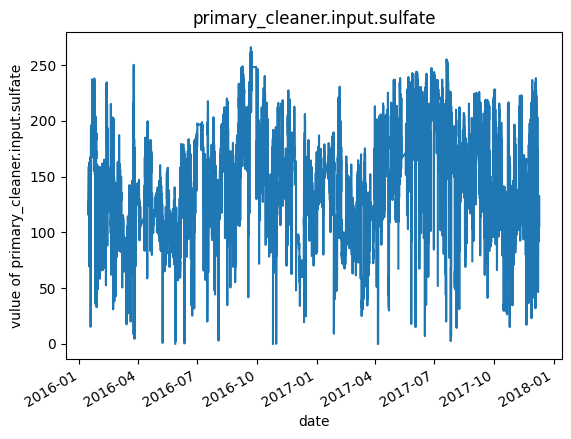

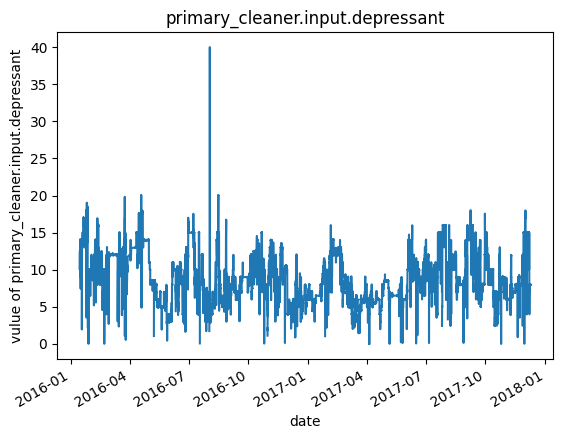

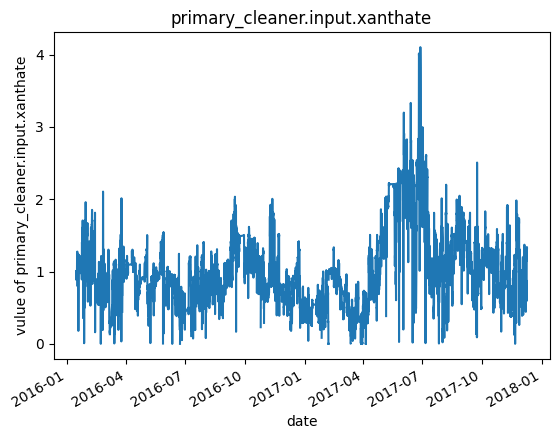

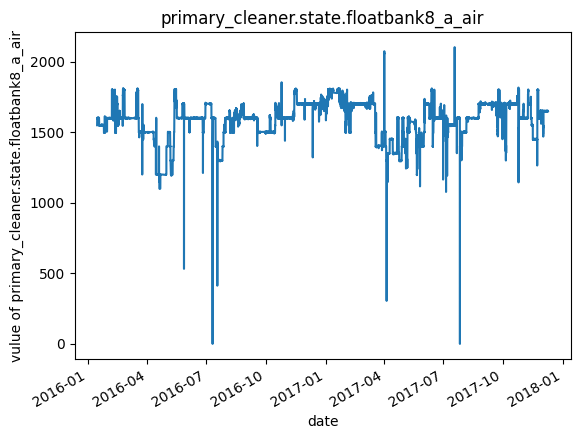

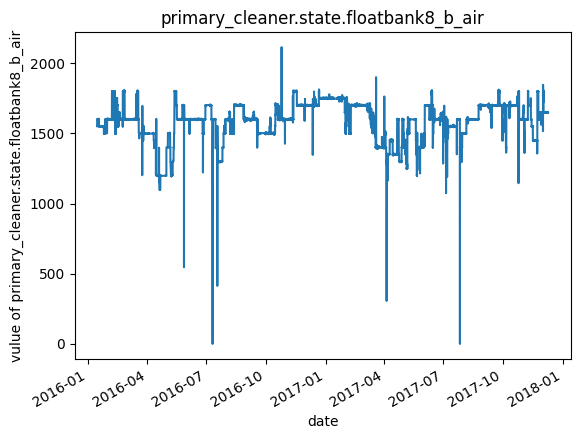

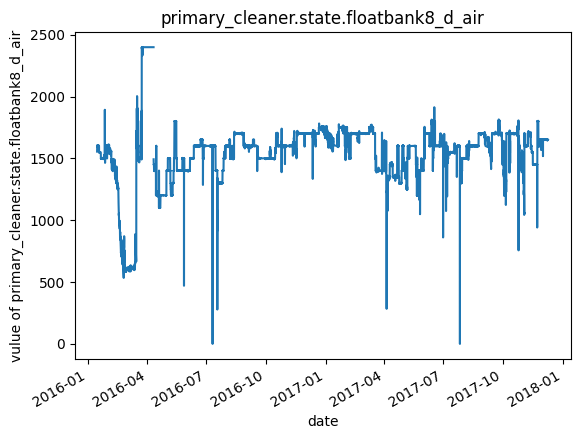

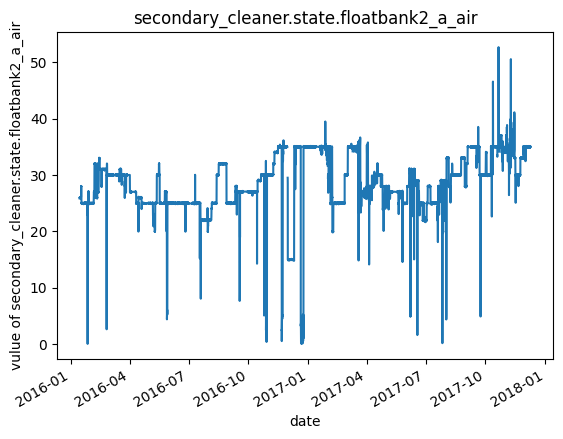

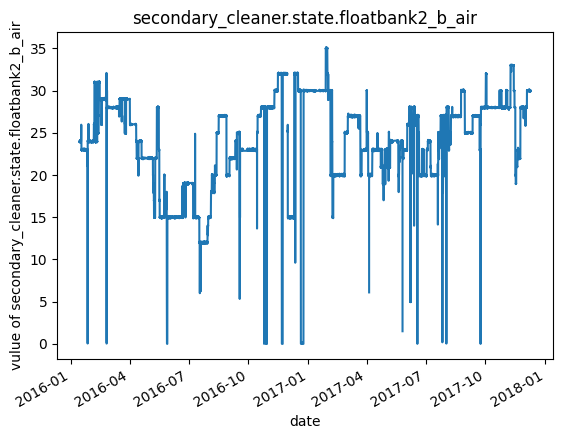

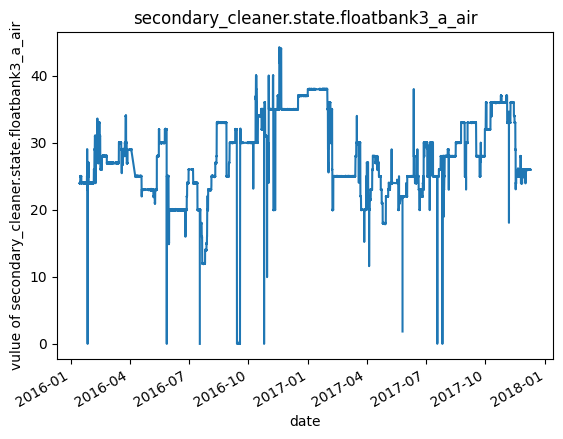

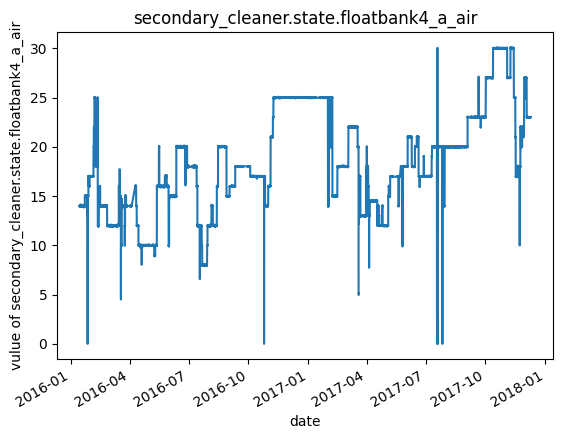

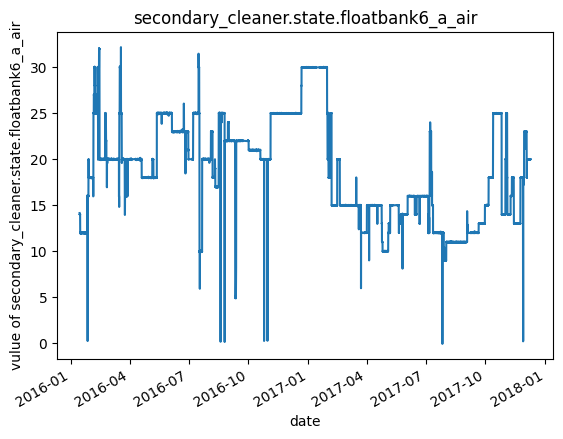

In [16]:
columns_with_na = (pd.DataFrame(gold_industry_train_final
             .isna()
             .sum())
[pd.DataFrame(gold_industry_train_final
              .isna()
              .sum())[0]>0]
.index)
for col in columns_with_na:
    gold_industry_train_final[col].plot(title = col)
    plt.ylabel("value of " + col)
    plt.show()

Можно заметить, что динамика изменений значений в столбцах с пропущенными данными имеет признаки непрерывной функции, где значения зависят от предыдущих. Т.е. значение близко к предыдущему по хронологии. К тому же это свойство известно из начальных условий задачи. Т.о. пропущенные данные можно заменить последним заполненным значением по хронологии

Заполним все пропуски во всех выборках последним ненулевым значением в столбцах.

In [17]:
gold_industry_full = gold_industry_full.fillna(method='ffill')
gold_industry_train = gold_industry_train.fillna(method='ffill')
gold_industry_test = gold_industry_test.fillna(method='ffill')

In [18]:
# Проверим есть ли еще попуски
gold_industry_train.isna().sum().sum()

0

In [19]:
#Посмотрим на распредеделение значений в столбцах
round (gold_industry_train.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
rougher.input.feed_au,14579.0,8.35,1.93,0.01,6.93,8.23,9.83,13.73
rougher.input.feed_ag,14579.0,8.88,1.92,0.01,7.34,8.72,10.26,14.60
rougher.input.feed_pb,14579.0,3.59,1.07,0.01,2.87,3.52,4.25,7.05
rougher.input.feed_sol,14579.0,36.55,5.22,0.01,34.08,37.09,39.89,53.48
rougher.input.feed_rate,14579.0,474.28,108.54,0.00,411.02,498.14,549.58,717.51
rougher.input.feed_size,14579.0,59.07,22.90,0.05,47.32,54.46,64.47,484.97
rougher.input.floatbank10_sulfate,14579.0,12.41,3.46,0.00,10.00,12.00,14.92,36.12
rougher.input.floatbank10_xanthate,14579.0,5.99,1.16,0.00,5.30,6.00,6.80,9.70
rougher.state.floatbank10_a_air,14579.0,1104.21,162.24,-0.04,999.64,1000.98,1292.66,1512.30
rougher.state.floatbank10_a_level,14579.0,-379.37,94.65,-657.95,-499.86,-300.31,-299.99,-273.78


Посмотрим на аномалии в данных. Изучим квантиль 0.5% и 99.5%

In [20]:
gold_industry_train.quantile([.005, .995])

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0.005,2.418009,4.573124,0.837613,15.107684,23.292522,30.505521,0.373220,0.033514,798.908731,-599.646978,995.277007,-532.007731,897.351998,-546.838335,793.518976,-550.270174,702.809048,-549.655610,699.628536,-551.037836,0.016165,0.390167,18287.417625,243.527777,7.658263,0.974481,0.000000,0.000000,0.000000,0.000000,0.000000,0.261997,2.917580,0.106314,10.367633,29.996386,2.015908,5.667335,0.012340,1198.184621,-550.103644,1197.417185,-566.927552,1196.755893,-556.926641,596.932470,-602.893669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.054276,-799.577137,2.963508e-17,-789.413418,1.932589e-16,-799.470694,1.521587e-17,-755.621627,7.955726,-787.639049,4.895948,-773.107258,7.161851,-600.308747,2.984429,-600.112647,8.991570,-632.076772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018706,0.080425,0.020286,0.101847
0.995,12.464389,13.404367,6.335754,48.312496,667.843245,191.129564,22.997679,8.401390,1500.414205,-298.841165,1702.012220,-299.642500,1747.907034,-299.511910,1699.505742,-299.095147,1601.423427,

Присутствует достаточно большое количество нулевых значений в концентрации золота на разных этапах очистки в концентрате и хвостах. Посмотрим на количество нулевых значение в концентрации золота на этапе после флотации и после всех очисток и на показатель recovery

In [21]:
columns_au = ['rougher.input.feed_au',
              'rougher.output.concentrate_au', 
              'rougher.output.tail_au',
              'final.output.concentrate_au',
              'final.output.tail_au',
              'rougher.output.recovery',
              'final.output.recovery']

In [22]:
# Количество нулей в целевых признаках и исходном сырье в выборки train
for col in columns_au:
    print(col,"-" ,len(gold_industry_train[gold_industry_train[col]==0]))

rougher.input.feed_au - 0
rougher.output.concentrate_au - 394
rougher.output.tail_au - 0
final.output.concentrate_au - 98
final.output.tail_au - 72
rougher.output.recovery - 394
final.output.recovery - 98


In [23]:
# Количество нулей в целевых признаках в выборке test на основании full
for col in columns_au:
    print(col,"-" ,len(gold_industry_full[gold_industry_full[col]==0][first_index_test:]))

rougher.input.feed_au - 0
rougher.output.concentrate_au - 0
rougher.output.tail_au - 0
final.output.concentrate_au - 0
final.output.tail_au - 19
rougher.output.recovery - 0
final.output.recovery - 0


Строк с нулевым значением не сильно много,  поэтому их можно удалить из train.

Выборку test оставим без изменения, т.к. в ней в целевых признаках нулевых значений нет, кроме только 19 нулевых значений в final.output.tail_au, но этот признак не участвует в обучении и в проверке

In [24]:
for col in columns_au:
    gold_industry_train = gold_industry_train[gold_industry_train[col]>0]

In [25]:
print ('Выборка train после удаления строк с 0 сократилась на', 
       round(100*(1-gold_industry_train.shape[0]/14579),1), 
       '%')

Выборка train после удаления строк с 0 сократилась на 3.8 %


### **Вывод**

В выборке train и test мы заполнили пропуски последним известным значением и убрали строки с нулевым значением в целевом признаке в выборке train. 

Выборка тест не уменьшилась в размере. Выборка train сократилась на 3.8%

## Анализ данных

### Посмотрим, как меняется концентрация металлов на различных этапах

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Опишем какие особенности имеют распределения.

Посмотрим на распределение концентрации для каждого металла и на каждом этапе

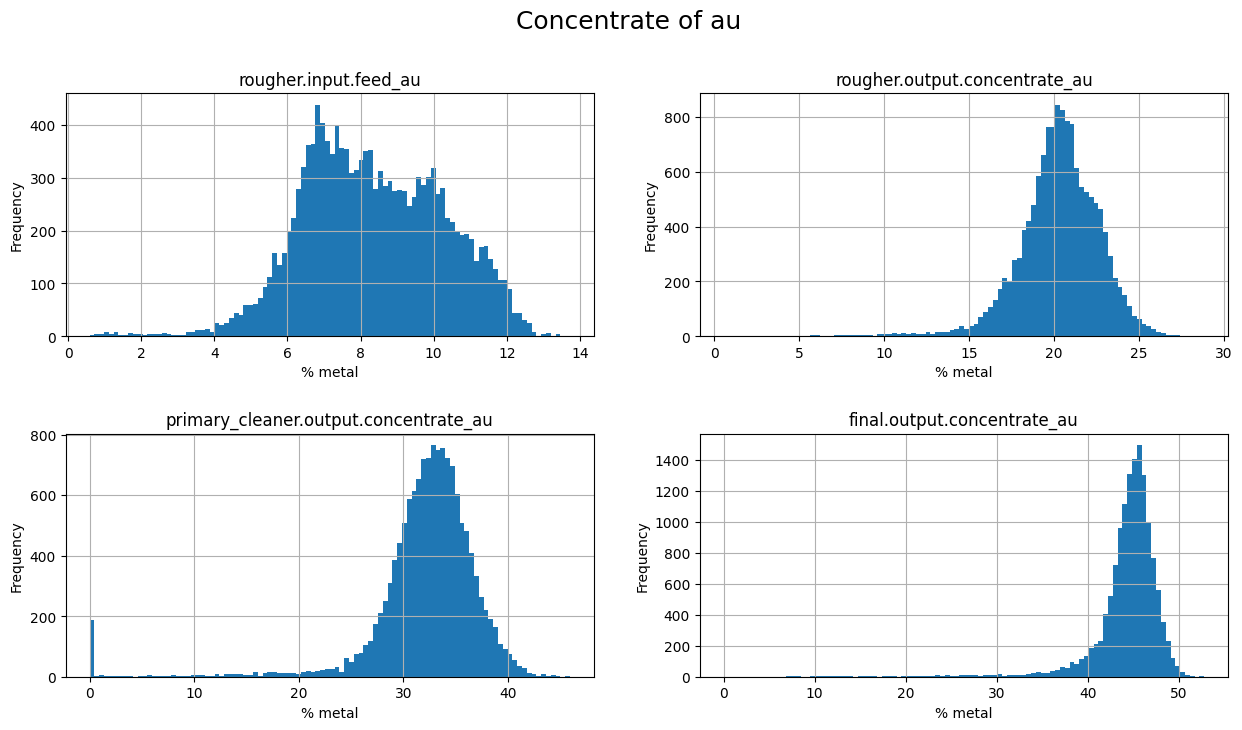

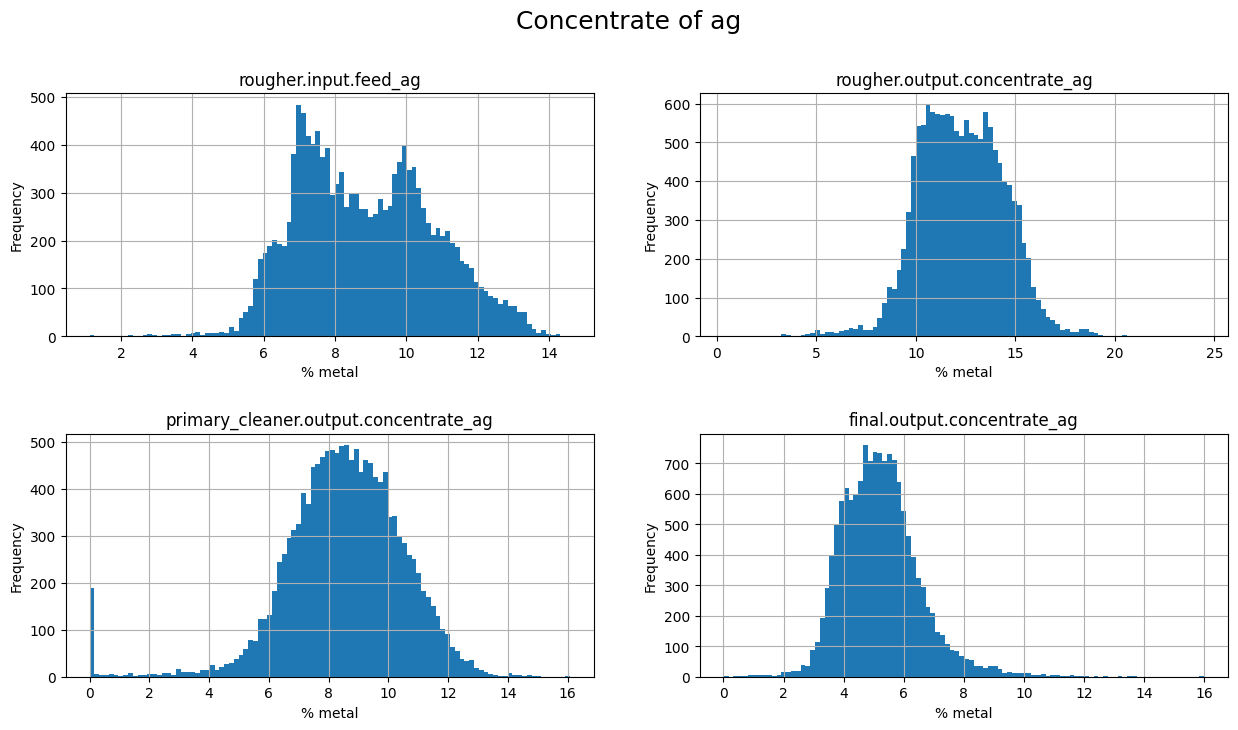

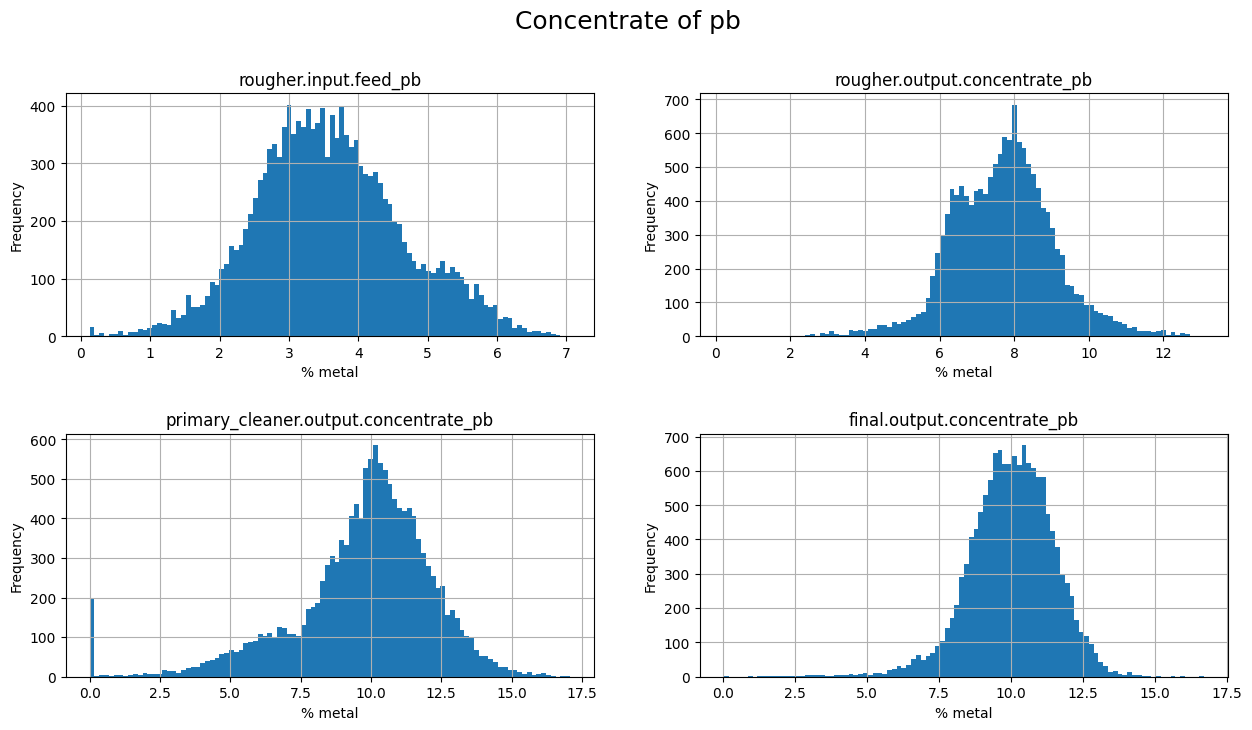

In [26]:
list_of_metal = ('au', 'ag', 'pb')
for metal in list_of_metal:
    metal_concentrate = ['rougher.input.feed_'+metal, 
                       'rougher.output.concentrate_'+metal,
                       'primary_cleaner.output.concentrate_'+metal,
                       'final.output.concentrate_'+metal]
    
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.4)
    plt.suptitle("Concentrate of "+metal, fontsize=18, y=0.95)
    for n, col in enumerate(metal_concentrate):
        ax = plt.subplot(3, 2, n + 1)
        gold_industry_train[col].plot(kind='hist', bins=100, ax=ax)
        ax.set_title(col)
        ax.set_xlabel("% metal")
        ax.grid()
        
    plt.show()
    

И отдельно посмотрим на распределение концентрации в хвостах

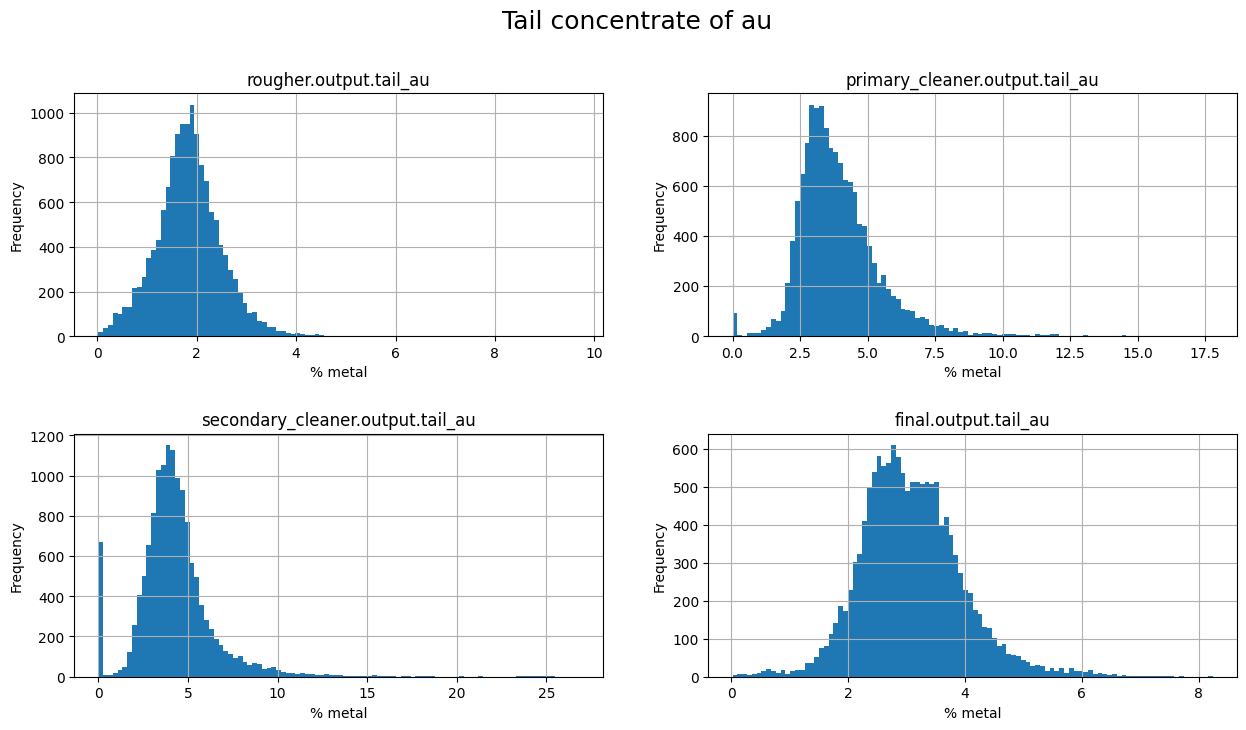

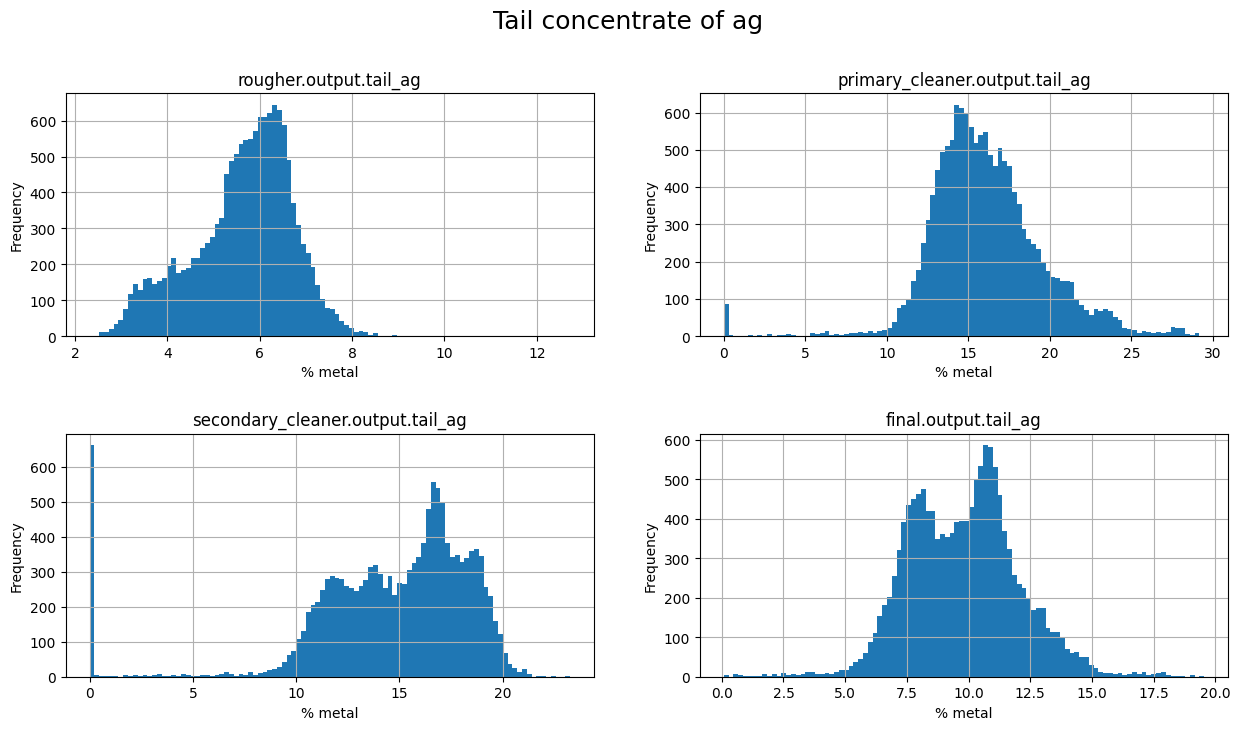

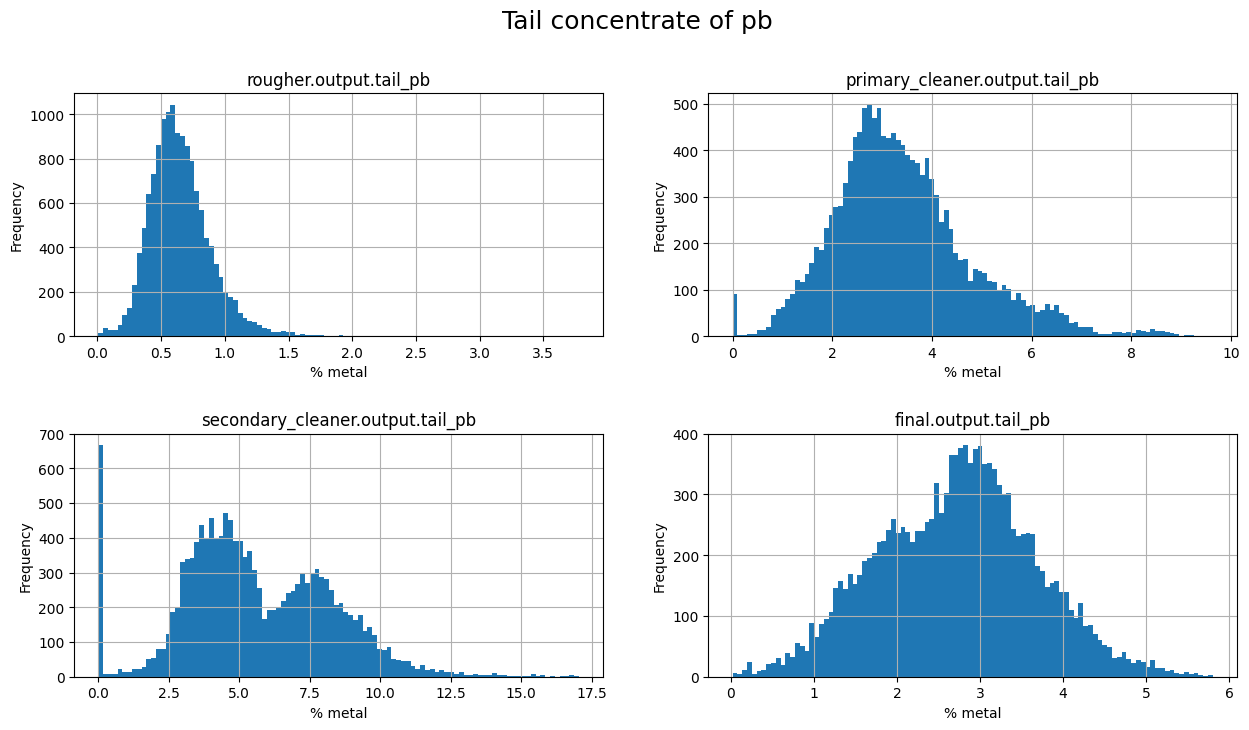

In [27]:
list_of_metal = ('au', 'ag', 'pb')

for metal in list_of_metal:
    metal_concentrate = ['rougher.output.tail_'+metal,
                       'primary_cleaner.output.tail_'+metal,
                       'secondary_cleaner.output.tail_'+metal,
                       'final.output.tail_'+metal]
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.4)
    plt.suptitle("Tail concentrate of "+metal, fontsize=18, y=0.95)
    for n, col in enumerate(metal_concentrate):
        ax = plt.subplot(3, 2, n + 1)
        gold_industry_train[col].plot(kind='hist', bins=100, ax=ax)
        ax.set_title(col)
        ax.set_xlabel("% metal")
        ax.grid()
        
    plt.show()

По гистограммам выше видно, что концентрация распределена на каждом этапе по нормальному распределению, за исключением выбросов со значением 0 после первичного и вторичного этапа очистки. Т.к. эта концентрация не будет в дальнейшем как либо участвовать в обучении модели (не является обучающим или целевым признаком), то можно эти выбросы проигнорировать

Посмотрим также на распределение средней концентрации по этапам для каждого металла

Изменение среднего значения концентрации au по этапам:
rougher.input.feed_au                     8.3
rougher.output.concentrate_au            20.3
primary_cleaner.output.concentrate_au    32.0
final.output.concentrate_au              44.3
dtype: float64


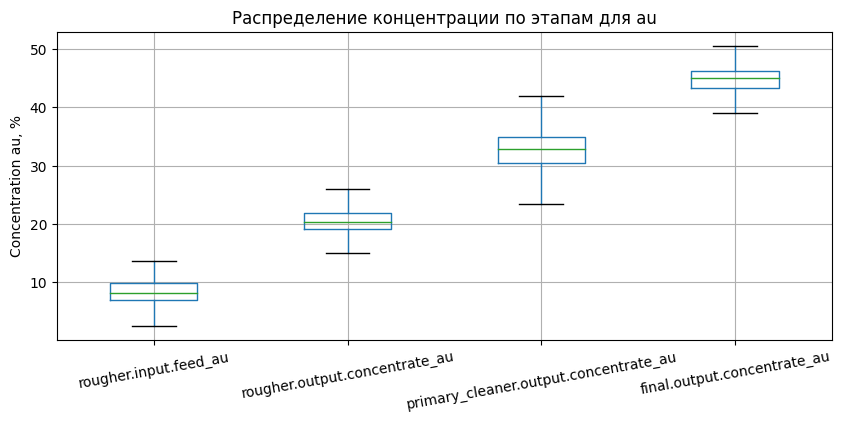

Изменение среднего значения концентрации ag по этапам:
rougher.input.feed_ag                     8.9
rougher.output.concentrate_ag            12.3
primary_cleaner.output.concentrate_ag     8.5
final.output.concentrate_ag               5.2
dtype: float64


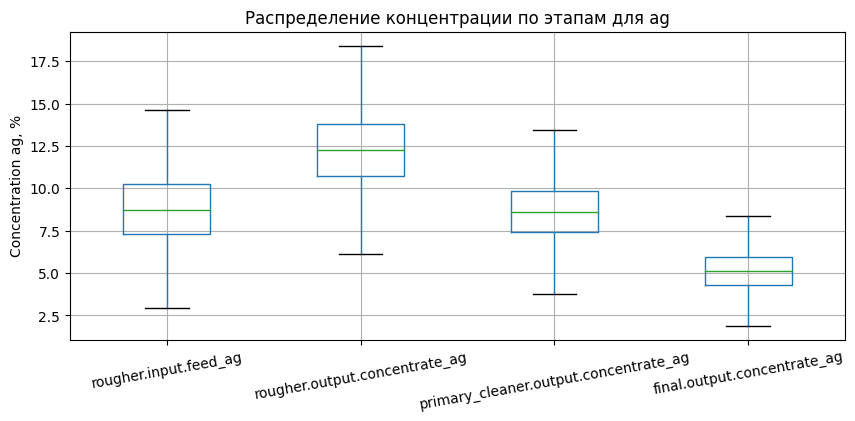

Изменение среднего значения концентрации pb по этапам:
rougher.input.feed_pb                     3.6
rougher.output.concentrate_pb             7.7
primary_cleaner.output.concentrate_pb     9.7
final.output.concentrate_pb              10.0
dtype: float64


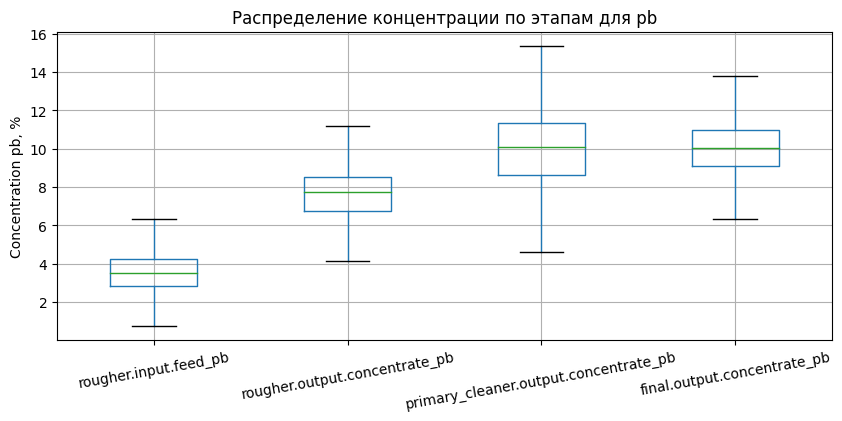

In [28]:
# Датафрейм куда запишем средние концентрации на каждом этапе
concentration_df = pd.DataFrame() 

# Распределение концентрации металлов в концентрате
list_of_metal = ('au', 'ag', 'pb')
for metal in list_of_metal:
    metal_concentrate = ['rougher.input.feed_'+metal, 
                       'rougher.output.concentrate_'+metal,
                       'primary_cleaner.output.concentrate_'+metal,
                       'final.output.concentrate_'+metal]
    print('Изменение среднего значения концентрации', metal, 'по этапам:')
    print (round(gold_industry_train[metal_concentrate].mean(),1)) 
    df_temp = round (gold_industry_train[metal_concentrate].mean(),1)
    concentration_df.loc['rougher.input.feed', metal]=df_temp[0]
    concentration_df.loc['rougher.output.concentrate', metal]=df_temp[1]
    concentration_df.loc['primary_cleaner.output.concentrate', metal]=df_temp[2]
    concentration_df.loc['final.output.concentrate', metal]=df_temp[3]
    
    (gold_industry_train.boxplot(
        column=metal_concentrate, 
        showfliers=False, 
        figsize=(10,4), 
        rot=10)
        .set_ylabel('Concentration '+ metal + ', %'));
    plt.title('Распределение концентрации по этапам для ' + metal)
    plt.show()

Изменение среднего значения концентрации хвостов au по этапам:
rougher.output.tail_au              1.8
primary_cleaner.output.tail_au      3.9
secondary_cleaner.output.tail_au    4.3
final.output.tail_au                3.1
dtype: float64


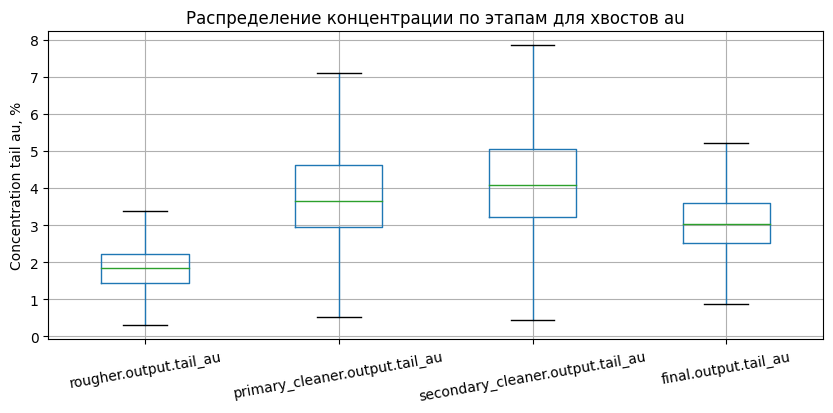

Изменение среднего значения концентрации хвостов ag по этапам:
rougher.output.tail_ag               5.6
primary_cleaner.output.tail_ag      16.1
secondary_cleaner.output.tail_ag    14.5
final.output.tail_ag                 9.8
dtype: float64


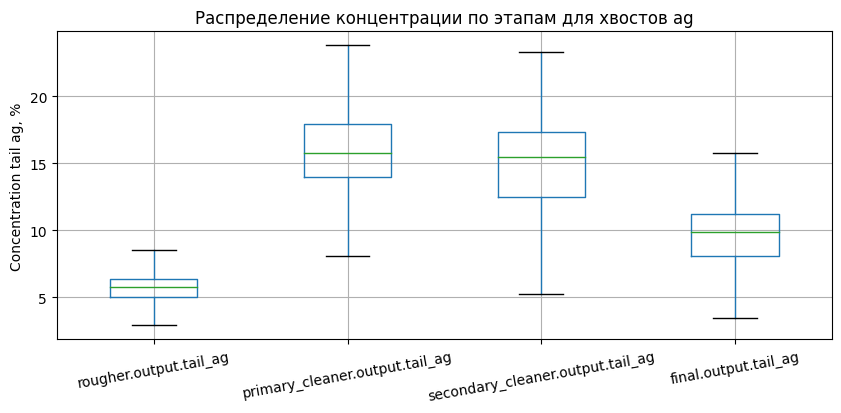

Изменение среднего значения концентрации хвостов pb по этапам:
rougher.output.tail_pb              0.7
primary_cleaner.output.tail_pb      3.4
secondary_cleaner.output.tail_pb    5.6
final.output.tail_pb                2.7
dtype: float64


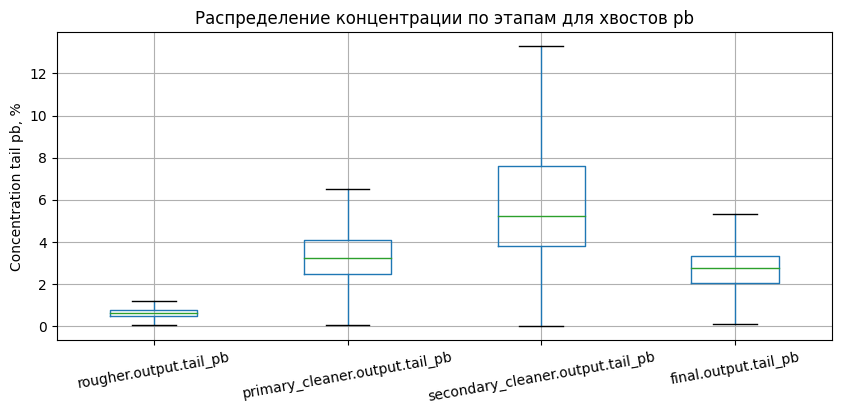

In [29]:
# Распределение концентрации металлов в хвостах
list_of_metal = ('au', 'ag', 'pb')

for metal in list_of_metal:
    metal_concentrate = ['rougher.output.tail_'+metal,
                       'primary_cleaner.output.tail_'+metal,
                       'secondary_cleaner.output.tail_'+metal,
                       'final.output.tail_'+metal]
    print('Изменение среднего значения концентрации хвостов', metal, 'по этапам:')
    print (round(gold_industry_train[metal_concentrate].mean(),1))
    df_temp = round (gold_industry_train[metal_concentrate].mean(),1)
    concentration_df.loc['rougher.output.tail', metal]=df_temp[0]
    concentration_df.loc['primary_cleaner.output.tail', metal]=df_temp[1]
    concentration_df.loc['secondary_cleaner.output.tail', metal]=df_temp[2]
    concentration_df.loc['final.output.tail', metal]=df_temp[3]
    (gold_industry_train.boxplot(
        column=metal_concentrate, 
        showfliers=False, 
        figsize=(10,4), 
        rot=10)
        .set_ylabel('Concentration tail '+ metal + ', %'));
    plt.title('Распределение концентрации по этапам для хвостов ' + metal)
    plt.show()

In [30]:
concentration_df

,au,ag,pb
rougher.input.feed,8.3,8.9,3.6
rougher.output.concentrate,20.3,12.3,7.7
primary_cleaner.output.concentrate,32.0,8.5,9.7
final.output.concentrate,44.3,5.2,10.0
rougher.output.tail,1.8,5.6,0.7
primary_cleaner.output.tail,3.9,16.1,3.4
secondary_cleaner.output.tail,4.3,14.5,5.6
final.output.tail,3.1,9.8,2.7


**Вывод:**

На обучающей выборке концентрация сырья меняется так:

- золото: равномерно повышается с 8% до 44%
- серебро: повышается с 9% до 12% после флотации и падает до 5% после очистки
- свинец: равномерно повышается с 4% до 10%

Концентрация в хвостах растет по всем металлам в процессе очистки. Можно заметить, что после первого и второго этапа очистки концентрация хвостов резко повышается, но финальная концентрация при этом ниже, чем после очистки. Это связано с тем, что финальная концентрация это концетрация смеси из хвостов после каждого этапа флотации\очистки и финальная - это смесь хвостов и таким образом средняя по всем этапам.

В целом по динамике изменения концентрации данный процесс в основном направлен на обогащение золота. Его концентрация в конечном концентрате в 5.5 раз выше чем, в исходном. 

Также этот процес немного обогащает свинец. Концентрация в итоге возрастает в 2.5 раза.

А вот серебро обогатить этим процессом сложно. Только если использовать предварительный процесс очистки и использовать полученнные хвосты как финальный концентрат для серебра. В хвостах после предварительной очистки содержится в 1.8 большая концентрация серебра, чем в исходном сырье

### Распределение размеров гранул исходного сырья

Сравните распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.


Построим диаграммы распределения размера для обучающей и тестовой выборки с учетом распределения плотности

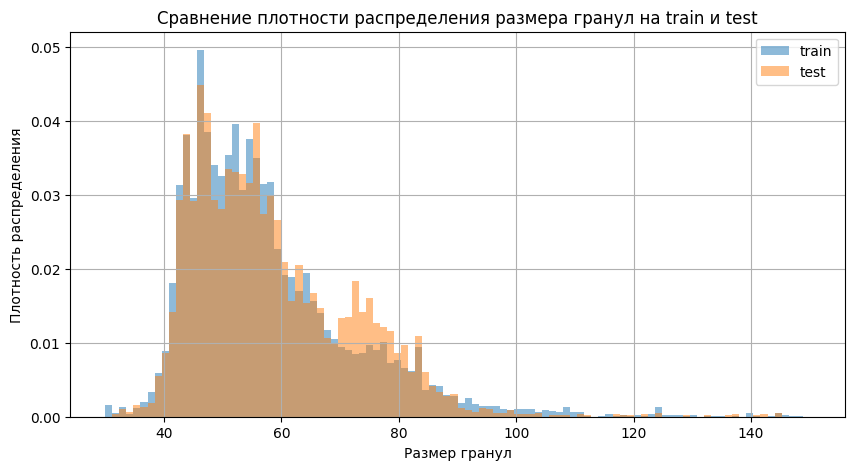

In [31]:
plt.figure(figsize=(10, 5))
fig = gold_industry_train['rougher.input.feed_size'].hist(bins=100, 
                                                    density=True, 
                                                    alpha=0.5, 
                                                    range=(30,150),
                                                    label='train'
                                                    )
fig.set_xlabel('Размер гранул')
fig.set_ylabel('Плотность распределения')
fig.set_title('Сравнение плотности распределения размера гранул на train и test')
fig.legend(loc='upper right')

(gold_industry_test['rougher.input.feed_size'].hist(bins=100, 
                                                   density=True,
                                                   alpha=0.5, 
                                                   range=(30,150),
                                                   label='test')
                                               .legend(loc='upper right'));

**Вывод:**

Распределение размера в целом очень похоже, но проверим равенство распределений через ttest.

Нулевая гипотеза: средний размер гранул на обучающей выборке равен среднему размеру на тестовой.

In [32]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу

results = st.ttest_ind(gold_industry_train['rougher.input.feed_size'],
                       gold_industry_test['rougher.input.feed_size'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9497589572484978
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Средний размер гранул на обучающей и тестовой имеют схожее распределение и статистически равное среднее значение

### Исследуем суммарную концентрацию металлов на разных стадиях
Исследуем на train суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.


In [33]:
#specify the columns to sum
sum_rougher_input = ['rougher.input.feed_au', 
                     'rougher.input.feed_ag', 
                     'rougher.input.feed_pb']
sum_rougher_output = ['rougher.output.concentrate_au', 
                      'rougher.output.concentrate_ag', 
                      'rougher.output.concentrate_pb']
sum_primary_cleaner = ['primary_cleaner.output.concentrate_au', 
                       'primary_cleaner.output.concentrate_ag', 
                       'primary_cleaner.output.concentrate_pb']
sum_final_output = ['final.output.concentrate_au',
                    'final.output.concentrate_ag', 
                    'final.output.concentrate_pb']

# Общая концентрация металлов в исходном сырье
gold_industry_train['sum_rougher_input'] = gold_industry_train[sum_rougher_input].sum(axis=1)

# Общая концентрация металлов после флотации
gold_industry_train['sum_rougher_output'] = gold_industry_train[sum_rougher_output].sum(axis=1)

# Общая концентрация металлов после первичной очистки
gold_industry_train['sum_primary_cleaner'] = gold_industry_train[sum_primary_cleaner].sum(axis=1)

# Общая концентрация металлов после первичной очистки
gold_industry_train['sum_final_output'] = gold_industry_train[sum_final_output].sum(axis=1)


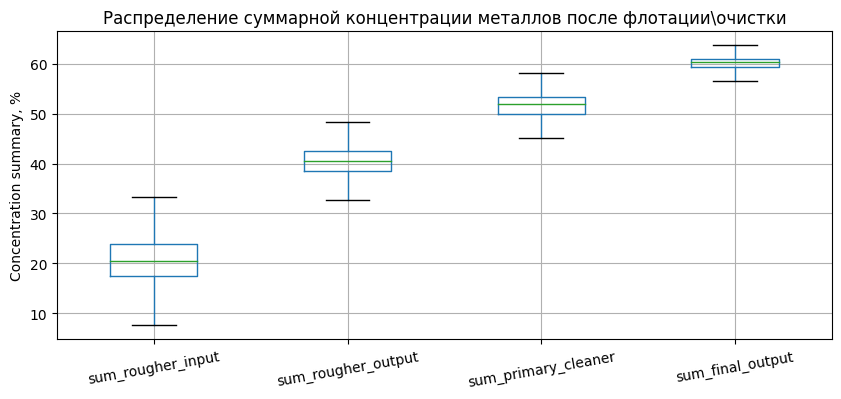

In [34]:
summ_list = ['sum_rougher_input', 
             'sum_rougher_output',
             'sum_primary_cleaner', 
             'sum_final_output']


(gold_industry_train.boxplot(column=summ_list, 
                            showfliers=False, 
                            figsize=(10,4), 
                            rot=10)
.set_ylabel('Concentration summary, %'));
plt.title('Распределение суммарной концентрации металлов после флотации\очистки')
plt.show()

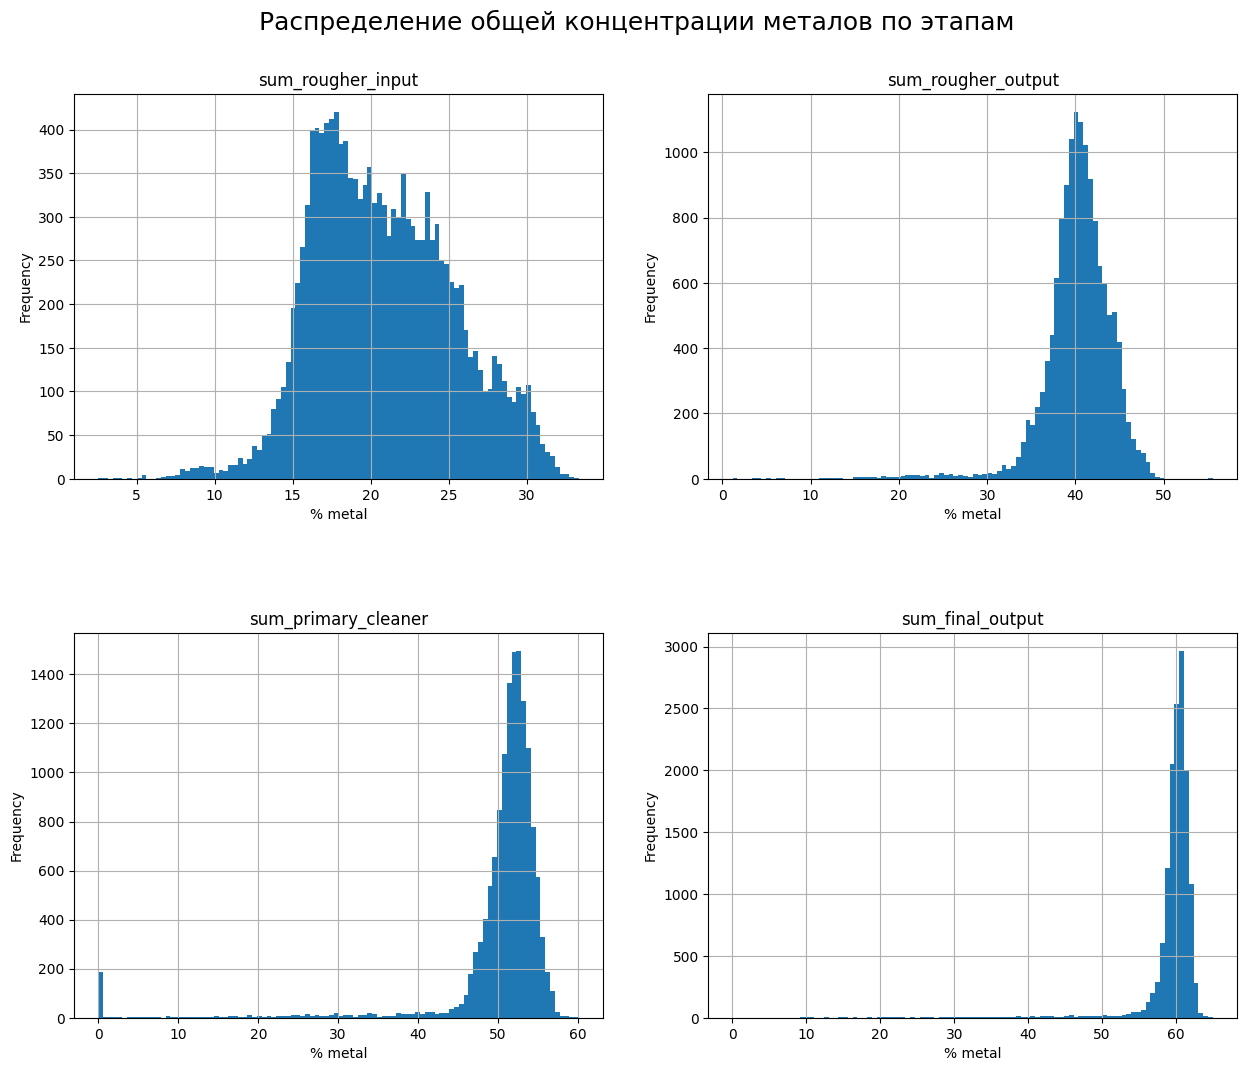

In [35]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.4)
plt.suptitle('Распределение общей концентрации металов по этапам', fontsize=18, y=0.95)
for n, phase in enumerate(summ_list):
    ax = plt.subplot(2, 2, n + 1)
    gold_industry_train[phase].plot(kind='hist', bins=100, ax=ax)
    ax.set_title(phase)
    ax.set_xlabel("% metal")
    ax.grid()
        
plt.show()

**Вывод:**

Суммарная концентрация ценных металлов по мере очистки растет в концентрате сырья с 20% до 60%. 

Имеются выбросы после вторичной очистки sum_primary_cleaner. Но после флотации и в итоговой концентрации выбросов не наблюдаются. Поэтому выбросы на промежуточных этапах игнорируем.

### Вывод

Концентрация металлов распределена на каждом этапе по нормальному распределению, за исключением выбросов со значением 0 после первичного и вторичного этапа очистки. Т.к. эта концентрация не будет в дальнейшем как либо участвовать в обучении модели (не является обучающим или целевым признаком), то можно эти выбросы проигнорировать

На обучающей выборке концентрация сырья меняется так:

- золотo: равномерно повышается с 8% до 44%
- серебро: повышается с 9% до 12% после флотации и падает до 5% после очистки
- свинец: равномерно повышается с 4% до 10%

В целом по динамике изменения концентрации данный процесс в основном направлен на обогащение золота. Его концентрация в конечном концентрате в 5.5 раз выше чем, в исходном.

Средний размер гранул на обучающей и тестовой имеют схожее распределение и статистически равное среднее значение

Суммарная концентрация ценных металлов по мере очистки растет в концентрате сырья с 20% до 60%.

## Обучение модели

### Функция для вычисления итоговой sMAPE

Напишем функцию вычисления итоговой sMAPE, которой на вход подаются целевые признаки

In [36]:
def smape (predict, target):
    smape = np.abs(predict-target)/((target+predict)/2)
    smape = np.mean(smape)
    return 100*smape

In [37]:
# Определим функцию посчета итогой оценки smape
def smape_final(smape_1, smape_2):
    return 0.25*smape_1+0.75*smape_2

### Обучение разных моделей

Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

Определим обучающую выборку и тестовую на основе полной

In [38]:
# перечень признаков для прогноза эффективности обогащения чернового концентрата 
columns_for_rougher = gold_industry_test.filter(regex='rougher').columns

# перечень признаков для прогноза эффективности обогащения финального концентрата
columns_for_final = gold_industry_test.columns

# Подготовка выборок для обучения
feature_train_rougher = gold_industry_train[columns_for_rougher]
target_train_rougher = gold_industry_train['rougher.output.recovery']

feature_train_final = gold_industry_train[columns_for_final]
target_train_final = gold_industry_train['final.output.recovery']

# Подготовка выборок для теста
feature_test_rougher = gold_industry_test[columns_for_rougher]
target_test_rougher = gold_industry_full.loc[first_index_test:, 'rougher.output.recovery']

feature_test_final = gold_industry_test
target_test_final = gold_industry_full.loc[first_index_test:, 'final.output.recovery']

Масштабирование данных во время обучения происходит внутри пайплана методом StandardScaler

Но тестовые данные сразу масштабируем через Scaler, который обучим на обучающих данных

In [39]:
list_for_scale_r = np.array(feature_test_rougher.columns)
list_for_scale_f = np.array(feature_test_final.columns)


In [40]:
#Масштабируем признаки
scaler_r = StandardScaler()
scaler_r.fit(feature_train_rougher[list_for_scale_r])

scaler_f = StandardScaler()
scaler_f.fit(feature_train_final[list_for_scale_f])

#Преобразуем обучающую выборку
feature_train_rougher = scaler_r.transform(feature_train_rougher)
feature_train_final = scaler_f.transform(feature_train_final)

#Преобразуем тестовую выборку
feature_test_rougher = scaler_r.transform(feature_test_rougher)
feature_test_final = scaler_f.transform(feature_test_final)

In [42]:
# Создадим функцию для скоринга нашей модели
scorer = make_scorer(smape, greater_is_better=False)

Найдем лучшую модель для прогнозирования rougher.output.recovery

In [43]:
%%time

STATE = np.random.RandomState(12345)

pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("regressor", RandomForestRegressor(random_state=STATE)),
    ]
)

param_grid = [
    {
        "regressor": [RandomForestRegressor(random_state=STATE)],
        "regressor__n_estimators": range(50,200,50),
        "regressor__max_depth": range(5, 10)
    },
    {
        "regressor": [Ridge(random_state=STATE)]
    },
    {
        "regressor": [LinearRegression()]
    }
]

grid_rougher = GridSearchCV(pipe, param_grid=param_grid, scoring=scorer, cv=3, verbose=2)
grid_rougher.fit(feature_train_rougher, target_train_rougher)

Fitting 3 folds for each of 17 candidates, totalling 51 fits
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=50; total time=   3.8s
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=50; total time=   3.1s
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=50; total time=   3.0s
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=100; total time=   6.2s
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=100; total time=   6.0s
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=100; total time=   6.3s
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=150; total time=   8.9s
[CV]

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', RandomForestRegressor())]),
             param_grid=[{'regressor': [RandomForestRegressor(max_depth=5,
                                                              n_estimators=150,
                                                              random_state=12345)],
                          'regressor__max_depth': range(5, 10),
                          'regressor__n_estimators': range(50, 200, 50)},
                         {'regressor': [Ridge(random_state=12345)]},
                         {'regressor': [LinearRegression()]}],
             scoring=make_scorer(smape, greater_is_better=False), verbose=2)

Найдем лучшую модель для прогнозирования final.output.recovery

In [44]:
%%time
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("regressor", RandomForestRegressor(random_state=STATE)),
    ]
)

param_grid = [
    {
        "regressor": [RandomForestRegressor(random_state=STATE)],
        "regressor__n_estimators": range(50, 150, 50),
        "regressor__max_depth": range(5, 10)
    },
    {
        "regressor": [Ridge(random_state=STATE)]
    },
    {
        "regressor": [LinearRegression()]
    }
]

grid_final = GridSearchCV(pipe, param_grid=param_grid, scoring=scorer, cv=3, verbose=2)
grid_final.fit(feature_train_final, target_train_final)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=50; total time=   7.8s
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=50; total time=   6.6s
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=50; total time=   6.7s
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=100; total time=  14.5s
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=100; total time=  14.8s
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=5, regressor__n_estimators=100; total time=  15.9s
[CV] END regressor=RandomForestRegressor(random_state=12345), regressor__max_depth=6, regressor__n_estimators=50; total time=   8.8s
[CV] 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('regressor', RandomForestRegressor())]),
             param_grid=[{'regressor': [RandomForestRegressor(max_depth=5,
                                                              n_estimators=50,
                                                              random_state=12345)],
                          'regressor__max_depth': range(5, 10),
                          'regressor__n_estimators': range(50, 150, 50)},
                         {'regressor': [Ridge(random_state=12345)]},
                         {'regressor': [LinearRegression()]}],
             scoring=make_scorer(smape, greater_is_better=False), verbose=2)

In [45]:
# best rougher model 
print(grid_rougher.best_estimator_)

# best rougher score
print(-grid_rougher.best_score_)

print("________")
# best final model
print(grid_final.best_estimator_)

# best final score
print(-grid_final.best_score_)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=5, n_estimators=150,
                                       random_state=12345))])
6.466130727313977
________
Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 RandomForestRegressor(max_depth=5, n_estimators=50,
                                       random_state=12345))])
9.954582933131158


In [50]:
smape_train = smape_final((-grid_rougher.best_score_), (-grid_final.best_score_))
smape_train

9.082469881676863

**Вывод:**

По итогу лучшей моделью для прогнозирования rougher.output.recovery и final.output.recovery получилась модель случайного леса с гиперпараметрами:

rougher.output.recovery:
- RandomForestRegressor (max_depth=5, n_estimators=150)
- Лучшая оценка на кросс-валидации 6.46

final.output.recovery:
- RandomForestRegressor (max_depth=5, n_estimators=50)  
- Лучшая оценка на кросс-валидации 9.95

Итоговое smape_final на обучающей выборке - 9.08

Посчитаем финальную оценку smape на тестовых данных

In [51]:
pred_rougher_test = grid_rougher.predict(feature_test_rougher)
pred_final_test = grid_final.predict(feature_test_final)

smape_f = smape_final(smape(pred_rougher_test, target_test_rougher), 
            smape(pred_final_test, target_test_final))

print('Итоговое smape для найденной модели на тестовых данных:', smape_f)

Итоговое smape для найденной модели на тестовых данных: 6.615326321423219


### Проверка модели на адекватность

In [52]:
# Проверим на адекватность с помощью DummyRegressor

dummy_r = DummyRegressor(strategy='mean')
dummy_r.fit(feature_test_rougher, target_test_rougher)
dummy_pred_r = dummy_r.predict(feature_test_rougher)

dummy_f = DummyRegressor(strategy='mean')
dummy_f.fit(feature_test_final, target_test_final)
dummy_pred_f = dummy_f.predict(feature_test_final)

smape_dummy = smape_final(smape(dummy_pred_r, target_test_rougher), 
                          smape(dummy_pred_f, target_test_final))

print('Итоговое smape для dummy функции:', smape_dummy)

Итоговое smape для dummy функции: 8.32418475576149


Дамми модель показывает на тестовых данных хуже точность чем наша модель. Проверка на адекватность найденная модель прошла

**Итоговый вывод:**

Провели предобработку обучающей выборки. Удалили выбросы с нулевым значением концентрации. В силу непрерывного характера изменений параметров установок, решено было пропуски заменить последним известным значением. 

Проверили динамику концентраций металлов после каждого этапа, определили среднюю степень обогащения каждого металла, убедились в одинаковом распределении размера гранул в train и test.

Проведен подбор модели на основании кросс-валидации среди 3х разных моделей: RandomForestRegressor, Ridge, LinearRegression

Лучшей моделью для предсказания показателей rougher.output.recovery и final.output.recovery оказалась модель:
- RandomForestRegressor(max_depth=5, n_estimators=150)

Итоговая оценка smape получилась:

- 6.37 на обучающих данных
- 6.61 на тестовых данных